## OpenCV

##### After augmentation, images store in data folder

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from collections import defaultdict
from PIL import Image
import numpy as np
import cv2
import csv

In [18]:
input_dir = "./data/train_simm_cosine"
output_dir = "./data/train_data_augumentations"
train_images = glob(input_dir + "/*/*")

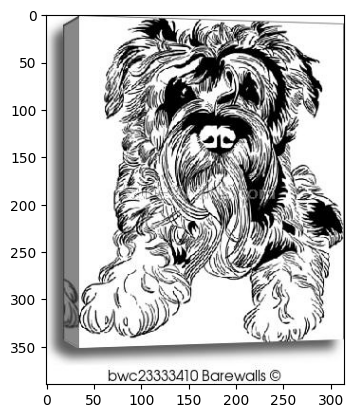

In [3]:
# img_path = './data/train/../..' 경로 직접 지정 가능
img = cv2.imread(np.random.choice(train_images))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


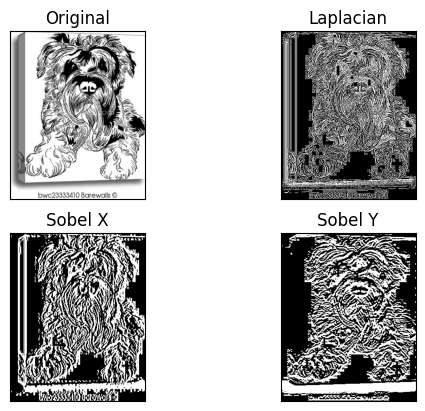

In [4]:
# Augmentation Example
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
 
plt.show()

In [17]:
# Apply transformations to all train data and create data_augmented folder
# Note: This process may take a long time depending on the situation.

if not os.path.exists(output_dir):
	os.makedirs(output_dir)

def apply_transformations(img):
	"""
	Apply Laplacian transformation to the input image and return both the Laplacian result and the result with Gaussian noise.
	
	Parameters:
	img (numpy.ndarray): Input grayscale image.
	
	Returns:
	tuple: (laplacian_image, noisy_laplacian_image)
		laplacian_image (numpy.ndarray): Image with Laplacian transformation applied.
		noisy_laplacian_image (numpy.ndarray): Laplacian-transformed image with Gaussian noise added.
	"""
	# Apply Laplacian transformation
	gaussian_blur = cv2.GaussianBlur(img, (7,7), 0)
	canny = cv2.Canny(img, threshold1=60, threshold2=250)
	kernel = np.ones((4,4), np.uint8)
	closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
	
	return gaussian_blur, canny, closing

# Make train.csv dictionary 
label_map = {}
with open('./data/train_simm_cosine.csv', 'r') as csvfile:
	reader = csv.reader(csvfile)
	for row in reader:
		# row[1]은 이미지 경로, row[2]는 클래스 레이블
		image_name = row[2]
		class_label = row[3]
		label_map[image_name] = class_label

# transform from all train images to augmentation images 
with open('./data/train_data_augmentations.csv', 'w', newline='') as csvfile:
	csv_writer = csv.writer(csvfile)
	csv_writer.writerow(['image_path', 'target'])  # 헤더 작성       

	# transform from all train images to augmentation images 
	for i, img_path in enumerate(train_images):
		# Load the image in grayscale
		img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
		print(i, img_path)
		if img is None:
			continue
				
		# Apply transformations
		gaussian_blur_img, canny_img, mopology_closing_img = apply_transformations(img)

		# 이미지 경로에서 파일 이름 추출 (예: n02106550/sketch_41.JPEG)
		relative_img_path = os.path.relpath(img_path, './data/train_simm_cosine')
		class_label = label_map.get(relative_img_path)

		# Generate output file names
		sequential_number = i + 1
		base_name = f'sketch_{sequential_number}'

		original_output_path = os.path.join(output_dir, f'{base_name}_original.JPEG')
		cv2.imwrite(original_output_path, img)
		gaussian_blur_img_path = os.path.join(output_dir, f'{base_name}_gaussian_blur.JPEG')
		cv2.imwrite(gaussian_blur_img_path, gaussian_blur_img)
		canny_img_path = os.path.join(output_dir, f'{base_name}_canny.JPEG')
		cv2.imwrite(canny_img_path, canny_img)
		mopology_closing_img_path = os.path.join(output_dir, f'{base_name}_mopology_closing_img.JPEG')
		cv2.imwrite(mopology_closing_img_path, mopology_closing_img)

  
		# Write to CSV
		csv_writer.writerow([f'{base_name}_original.JPEG', class_label])
		csv_writer.writerow([f'{base_name}_gaussian_blur.JPEG', class_label])
		csv_writer.writerow([f'{base_name}_canny.JPEG', class_label])
		csv_writer.writerow([f'{base_name}_mopology_closing_img.JPEG', class_label])

	print("Image augmentation completed and saved to", output_dir)

0 ./data/train_simm_cosine/n03347037/sketch_25.JPEG
1 ./data/train_simm_cosine/n03347037/sketch_5.JPEG
2 ./data/train_simm_cosine/n03347037/sketch_27.JPEG
3 ./data/train_simm_cosine/n03347037/sketch_14.JPEG
4 ./data/train_simm_cosine/n03347037/sketch_22.JPEG
5 ./data/train_simm_cosine/n03347037/sketch_0.JPEG
6 ./data/train_simm_cosine/n03347037/sketch_2.JPEG
7 ./data/train_simm_cosine/n03347037/sketch_3.JPEG
8 ./data/train_simm_cosine/n03347037/sketch_8.JPEG
9 ./data/train_simm_cosine/n03347037/sketch_28.JPEG
10 ./data/train_simm_cosine/n03347037/sketch_50.JPEG
11 ./data/train_simm_cosine/n02442845/sketch_40.JPEG
12 ./data/train_simm_cosine/n02442845/sketch_25.JPEG
13 ./data/train_simm_cosine/n02442845/sketch_24.JPEG
14 ./data/train_simm_cosine/n02442845/sketch_23.JPEG
15 ./data/train_simm_cosine/n02442845/sketch_5.JPEG
16 ./data/train_simm_cosine/n02442845/sketch_37.JPEG
17 ./data/train_simm_cosine/n02442845/sketch_9.JPEG
18 ./data/train_simm_cosine/n02442845/sketch_36.JPEG
19 ./data/

## Torchvision.Transforms

#### After testing, the code add in select_transform.py

In [33]:
import torch
import torchvision.transforms as transforms
from PIL import Image

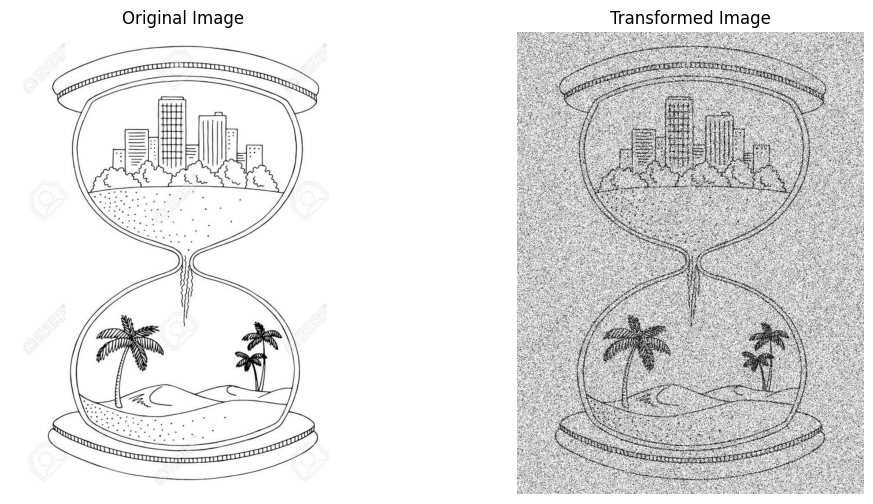

In [29]:
# Augmentation Example
# For other libraries, see the following links: https://pytorch.org/vision/0.9/transforms.html

# OpenCV image -> PIL image
img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

class AddGaussianNoise(object):
    def __init__(self, mean=0.0, std=1.0):
        self.mean = mean
        self.std = std

    def __call__(self, img):
        np_img = np.array(img)
        noise = np.random.normal(self.mean, self.std, np_img.shape)
        noisy_img = np_img + noise
        noisy_img = np.clip(noisy_img, 0, 255)  # Clip values to stay within [0, 255]
        return Image.fromarray(noisy_img.astype(np.uint8))

# Define various transformations
transform = transforms.Compose([
    transforms.ColorJitter(contrast=0.8),       # Adjust contrast
    AddGaussianNoise(mean=0.0, std=70.0),                # Add Gaussian noise
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 0.5)),  # Slight Gaussian blur
    transforms.Grayscale(num_output_channels=1), # Ensure grayscale
    transforms.ToTensor(),                      # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5]) # Normalize
])

transformed_img = transform(img_pil)
transformed_img_pil = transforms.ToPILImage()(transformed_img)

# Display original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(img_pil)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed image
ax[1].imshow(transformed_img_pil, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.show()

## Albumentations.Transforms

#### After testing, the code add in select_transform.py

In [32]:
import albumentations as A

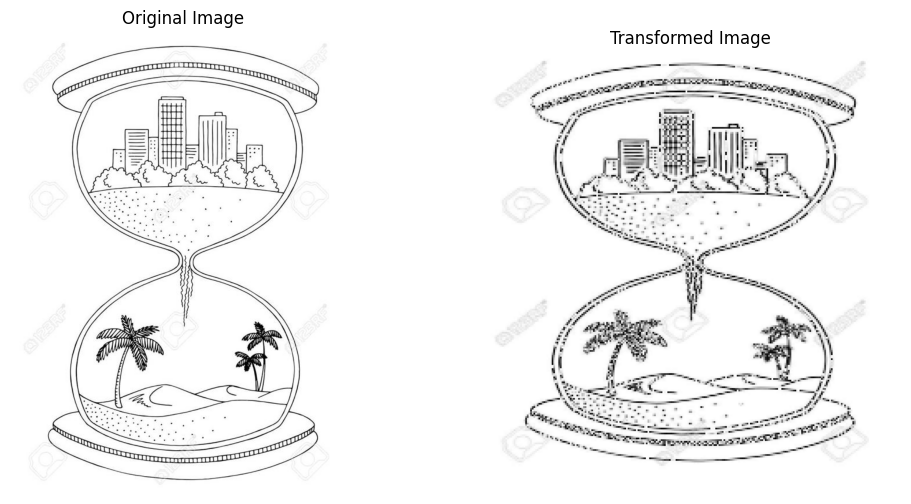

In [40]:
# Declare an augmentation
# For other libraries, see the following links: https://albumentations.ai/docs/getting_started/transforms_and_targets/
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.8, contrast_limit=0.2, p=0.5),  # Random brightness and contrast
    A.GaussianBlur(blur_limit=(3, 3), p=0.3),     # Slight Gaussian blur
    A.Resize(height=256, width=256),              # Resize to 256x256
    A.Normalize(mean=(0.5,), std=(0.5,), max_pixel_value=255.0),  # Normalize
])

# Apply transformations
transformed  = transform(image=img)
transformed_img = transformed["image"]

# Convert the tensor back to a PIL image for display
transformed_img_pil = Image.fromarray((transformed_img * 255).astype(np.uint8))

# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed image
ax[1].imshow(transformed_img_pil, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.show()


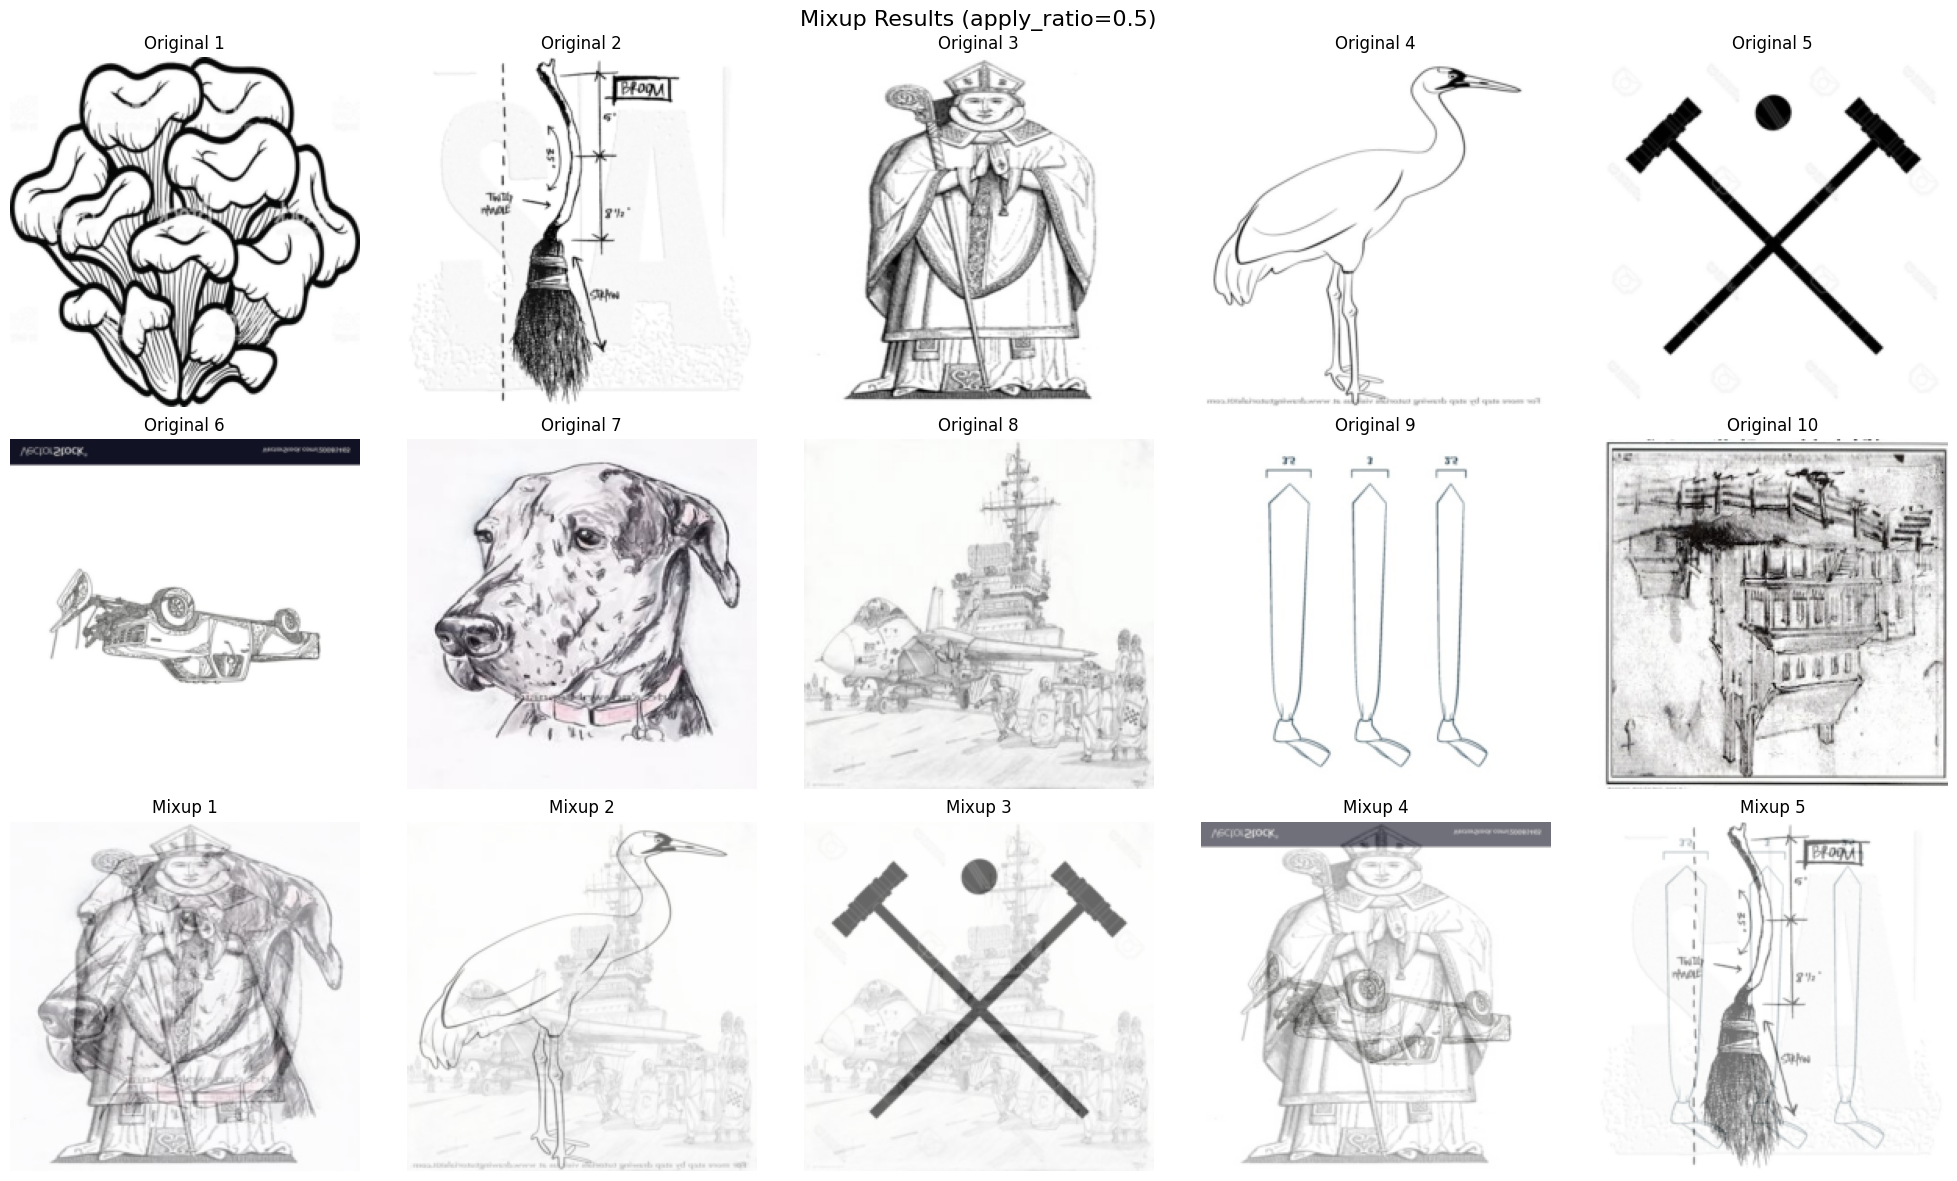

In [17]:
##### Mixup Test ######
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from glob import glob
import random

# mixup 함수
def mixup(images, labels, alpha=1.0, apply_ratio = 1.0):
    
    batch_size = len(images)
    num_apply = int(batch_size * apply_ratio)

    # 적용할 이미지 인덱스를 무작위로 선택
    apply_indices = torch.randperm(batch_size)[:num_apply]

    mixedup_images = []
    mixedup_labels = []
    lam_list = []


    for i in apply_indices:
        # 현재 이미지와 다른 이미지를 선택
        while True:
            j = torch.randint(0, batch_size, (1,)).item()
            if j != i:
                break
        
        # 베타 분포에서 샘플링된 값으로 lambda를 구함
        lam = np.clip(np.random.beta(alpha, alpha), 0.5, 0.6)
        
        # 이미지와 레이블을 lam 비율에 따라 선형 결합
        mixed_image = lam * images[i] + (1 - lam) * images[j]
        mixed_label = lam * labels[i] + (1 - lam) * labels[j]
        
        mixedup_images.append(mixed_image)
        mixedup_labels.append(mixed_label)
        lam_list.append(lam)
    
    # 리스트를 텐서로 변환
    mixedup_images = torch.stack(mixedup_images)
    mixedup_labels = torch.stack(mixedup_labels)    
    
    return mixedup_images, mixedup_labels, lam_list
  
# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    return transform(image)
  
# 랜덤하게 10개의 이미지 선택
selected_images = random.sample(train_images, 10)

# 이미지 로드 및 전처리
images = [load_and_preprocess_image(img_path) for img_path in selected_images]
images_tensor = torch.stack(images)

# 더미 레이블 생성 (실제 레이블이 없으므로 임의의 값 사용)
dummy_labels = torch.randint(0, 45, (10, 45)).float()  # 원-핫 인코딩 형태로 가정

# Mixup 적용
mixup_images, mixup_labels, _ = mixup(images_tensor, dummy_labels, alpha=1.0, apply_ratio=0.5)

# 결과 시각화
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
fig.suptitle("Mixup Results (apply_ratio=0.5)", fontsize=16)

# 원본 이미지 10개 표시
for i in range(10):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(images[i].permute(1, 2, 0))
    ax.set_title(f"Original {i+1}")
    ax.axis('off')

# Mixup 결과 5개 표시
for i in range(5):
    ax = axes[2, i]
    ax.imshow(mixup_images[i].permute(1, 2, 0))
    ax.set_title(f"Mixup {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

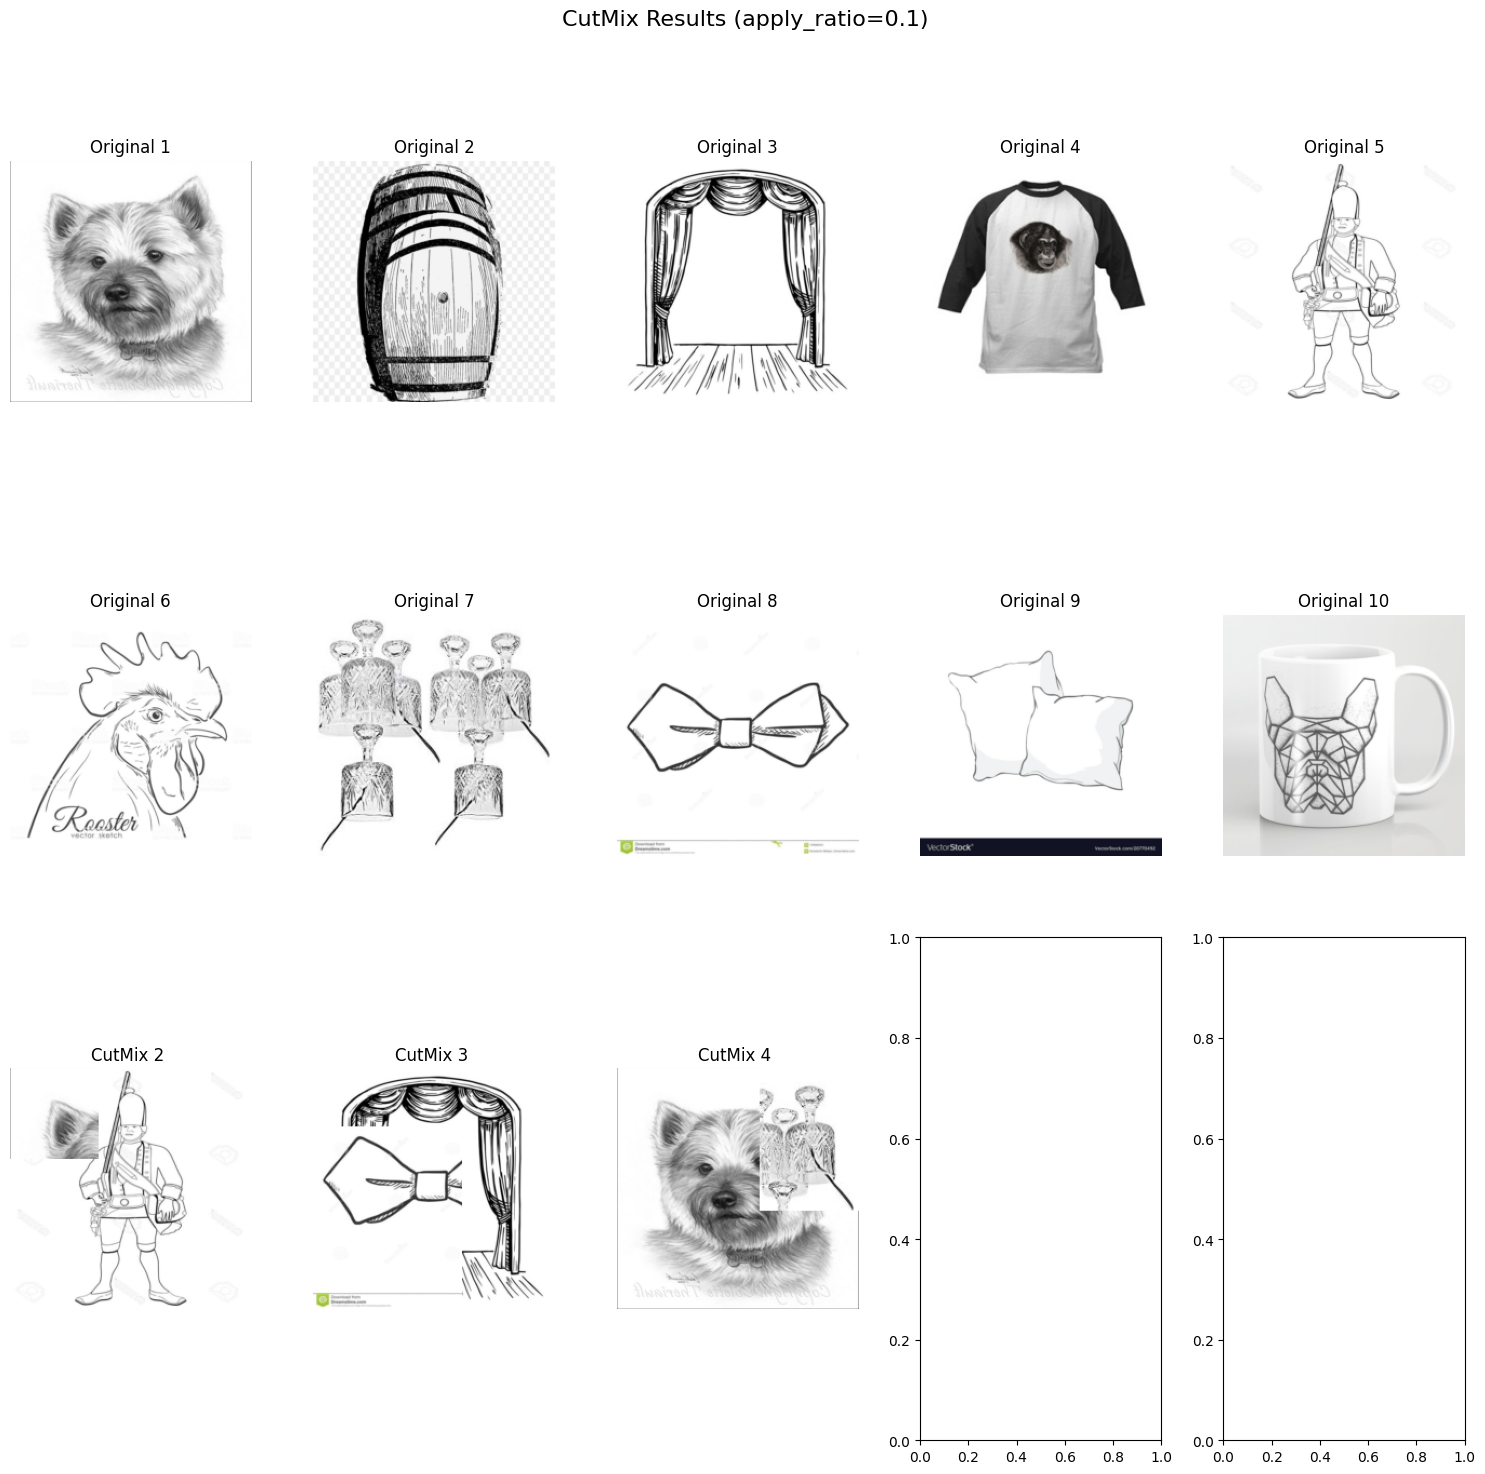

In [16]:
###### CutMix Test ######
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
from torchvision import transforms
import random

# CutMix 함수 정의 (이전에 제공된 함수를 사용)
def cutmix(batch, alpha=0.9, apply_ratio=0.1):
    data, targets = batch
    batch_size = data.size(0)
    num_apply = int(batch_size * apply_ratio)
    
    apply_indices = torch.randperm(batch_size)[:num_apply]
    
    new_data = data.clone()
    new_targets = []
    
    for i in apply_indices:
        while True:
            j = torch.randint(0, batch_size, (1,)).item()
            if j != i:
                break
        
        lam = np.random.uniform(0.1, alpha)
        
        image_h, image_w = data.shape[2:]
        cx = np.random.uniform(0, image_w)
        cy = np.random.uniform(0, image_h)
        w = image_w * np.sqrt(1 - lam)
        h = image_h * np.sqrt(1 - lam)
        x0 = int(np.round(max(cx - w / 2, 0)))
        x1 = int(np.round(min(cx + w / 2, image_w)))
        y0 = int(np.round(max(cy - h / 2, 0)))
        y1 = int(np.round(min(cy + h / 2, image_h)))
        
        new_data[i, :, y0:y1, x0:x1] = data[j, :, y0:y1, x0:x1]
        new_targets.append((targets[i], targets[j], lam))
    
    return new_data[apply_indices], new_targets

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    return transform(image)

# 랜덤하게 10개의 이미지 선택
selected_images = random.sample(train_images, 10)

# 이미지 로드 및 전처리
images = [load_and_preprocess_image(img_path) for img_path in selected_images]
images_tensor = torch.stack(images)

# 더미 타겟 생성 (실제 레이블이 없으므로 임의의 값 사용)
dummy_targets = torch.randint(0, 45, (10,))

# CutMix 적용
cutmix_images, _ = cutmix((images_tensor, dummy_targets), alpha=0.9, apply_ratio=0.4)

# 결과 시각화
fig, axes = plt.subplots(3, 5, figsize=(15, 15))
fig.suptitle("CutMix Results (apply_ratio=0.1)", fontsize=16)

# 원본 이미지 2개 표시
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(images[i].permute(1, 2, 0))
    ax.set_title(f"Original {i+1}")
    ax.axis('off')

# CutMix 결과 표시 (apply_ratio에 맞게)
cutmix_count = 0
for i in range(3):
    for j in range(3):
        if i == 0 and j < 2:
            continue
        ax = axes[2, j]
        if cutmix_count < len(cutmix_images):
            ax.imshow(cutmix_images[cutmix_count].permute(1, 2, 0))
            ax.set_title(f"CutMix {cutmix_count+1} ")
            cutmix_count += 1
        else:
            ax.axis('off')
        ax.axis('off')

plt.tight_layout()
plt.show()
  